In [6]:
from run_experiment import Experiment
from radar_plots import RadarPlot
import os
import sys
current_directory = os.getcwd()
if not os.path.exists(current_directory + '\\experimental_data'):
    os.makedirs(current_directory + '\\experimental_data')
    os.makedirs(current_directory + '\\experimental_data\\plots')
    os.makedirs(current_directory + '\\experimental_data\\results')
sys.path.append(current_directory.replace('experiments', ''))
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
from run import execute_simulation, create_experiment_snapshots, execute_ai_model, single_mtd_simulation, mtd_ai_simulation, multiple_mtd_simulation, specific_multiple_mtd_simulation
from mtdnetwork.mtd.completetopologyshuffle import CompleteTopologyShuffle
from mtdnetwork.mtd.ipshuffle import IPShuffle
from mtdnetwork.mtd.hosttopologyshuffle import HostTopologyShuffle
from mtdnetwork.mtd.portshuffle import PortShuffle
from mtdnetwork.mtd.osdiversity import OSDiversity
from mtdnetwork.mtd.servicediversity import ServiceDiversity
from mtdnetwork.mtd.usershuffle import UserShuffle
from mtdnetwork.mtd.osdiversityassignment import OSDiversityAssignment
import logging
import pandas as pd
import numpy as np
from math import pi
import matplotlib.pyplot as plt

logging.basicConfig(format='%(message)s', level=logging.INFO)

In [7]:
# Learning Parameters
epsilon = 1.0  # exploration rate

# Simulator Settings
start_time = 0
finish_time = 3000
mtd_interval = [200]
network_size = [25]
total_nodes = 300
new_network = True

trial = 3000

mtd_strategies = [
    CompleteTopologyShuffle,
    # HostTopologyShuffle,
    IPShuffle,
    OSDiversity,
    # PortShuffle,
    # OSDiversityAssignment,
    ServiceDiversity,
    # UserShuffle
]

result_head_path = '/home/22701889/Documents/MTDSim'
static_features = ["host_compromise_ratio", "exposed_endpoints", "attack_path_exposure",  "overall_asr_avg", "roa", "shortest_path_variability", "risk"]
time_features = ["mtd_freq", "overall_mttc_avg"]
models = static_features + time_features

{'random': {'ASR': 1.948717948717949, 'time_to_compromise': 0.6783407612050005, 'attack_path_exposure': 0.983115468409586, 'ROA': 1.9580821334201168, 'risk': 1.4407564403505013, 'shortest_path_variability': 1.0}, 'alternative': {'ASR': 1.948717948717949, 'time_to_compromise': 0.6810570164760662, 'attack_path_exposure': 0.9812745394140743, 'ROA': 1.7831937199127463, 'risk': 1.3663889609951643, 'shortest_path_variability': 1.0}, 'simultaneous': {'ASR': 3.6923076923076934, 'time_to_compromise': 0.555439839757529, 'attack_path_exposure': 0.9810572509863916, 'ROA': 2.1860890062892944, 'risk': 1.4407564403505013, 'shortest_path_variability': 1.0}}


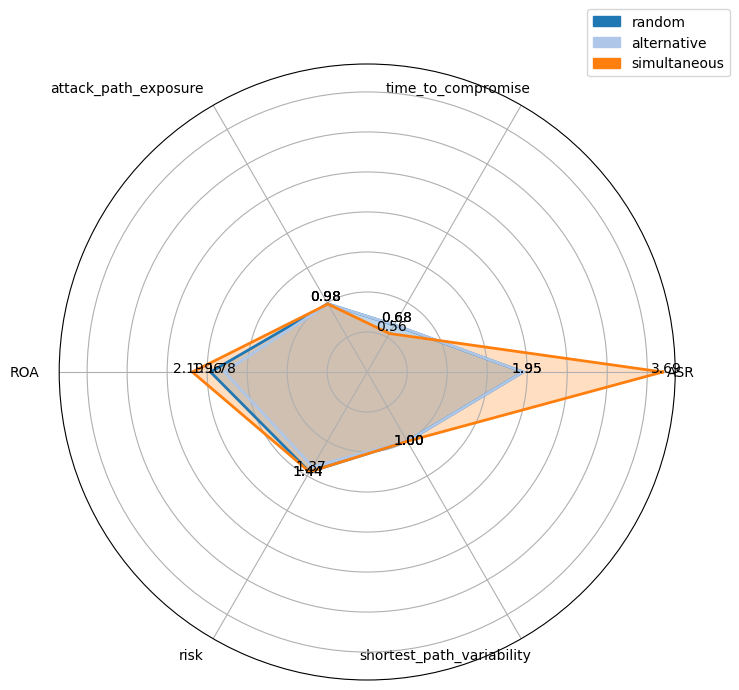

In [8]:
radar = RadarPlot(epsilon, start_time, finish_time, mtd_interval, network_size,total_nodes, new_network,  "all_features", trial, result_head_path)
schemes_data = pd.DataFrame(radar.multiple_scaled_pipeline(['random', 'alternative', "simultaneous"],run_trial = False)).T.drop(columns=['MEF', 'host_compromise_ratio', 'network_size', 'exposed_endpoints', "mtd_interval"], axis = 1).T.to_dict()
print(schemes_data)
radar.plot_n_schemes(schemes_data)

{'host_compromise_ratio': {'ASR': 2.5641025641025643, 'time_to_compromise': 0.8889556996967776, 'attack_path_exposure': 3.5325883418906656, 'ROA': 1.2969000851262424, 'risk': 1.195276831961158, 'shortest_path_variability': 1.0}, 'random': {'ASR': 1.948717948717949, 'time_to_compromise': 0.6783407612050005, 'attack_path_exposure': 0.983115468409586, 'ROA': 1.9580821334201168, 'risk': 1.4407564403505013, 'shortest_path_variability': 1.0}, 'alternative': {'ASR': 1.948717948717949, 'time_to_compromise': 0.6810570164760662, 'attack_path_exposure': 0.9812745394140743, 'ROA': 1.7831937199127463, 'risk': 1.3663889609951643, 'shortest_path_variability': 1.0}, 'simultaneous': {'ASR': 3.6923076923076934, 'time_to_compromise': 0.555439839757529, 'attack_path_exposure': 0.9810572509863916, 'ROA': 2.1860890062892944, 'risk': 1.4407564403505013, 'shortest_path_variability': 1.0}}


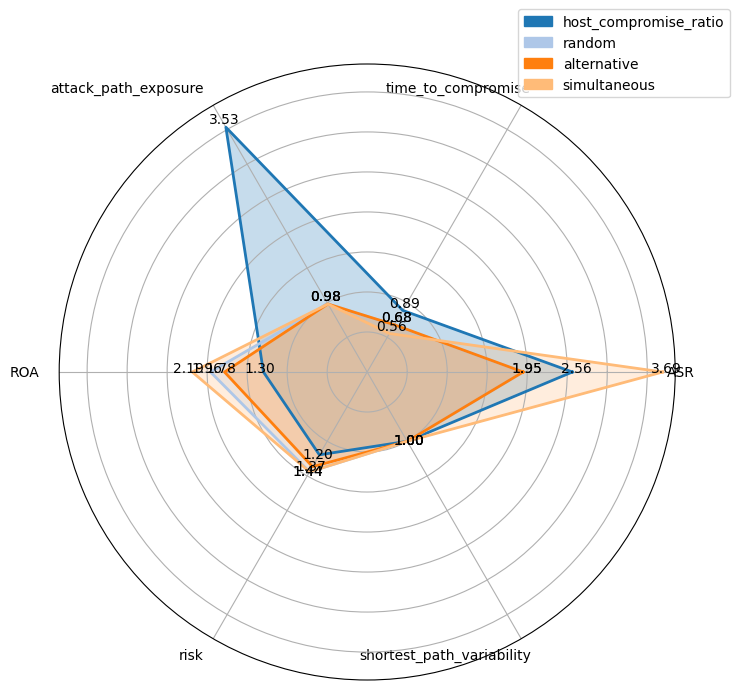

{'exposed_endpoints': {'ASR': 2.5641025641025643, 'time_to_compromise': 0.8888615293689891, 'attack_path_exposure': 3.5248594142713356, 'ROA': 1.4013580603997515, 'risk': 1.3760572845746573, 'shortest_path_variability': 1.0}, 'random': {'ASR': 1.948717948717949, 'time_to_compromise': 0.6783407612050005, 'attack_path_exposure': 0.983115468409586, 'ROA': 1.9580821334201168, 'risk': 1.4407564403505013, 'shortest_path_variability': 1.0}, 'alternative': {'ASR': 1.948717948717949, 'time_to_compromise': 0.6810570164760662, 'attack_path_exposure': 0.9812745394140743, 'ROA': 1.7831937199127463, 'risk': 1.3663889609951643, 'shortest_path_variability': 1.0}, 'simultaneous': {'ASR': 3.6923076923076934, 'time_to_compromise': 0.555439839757529, 'attack_path_exposure': 0.9810572509863916, 'ROA': 2.1860890062892944, 'risk': 1.4407564403505013, 'shortest_path_variability': 1.0}}


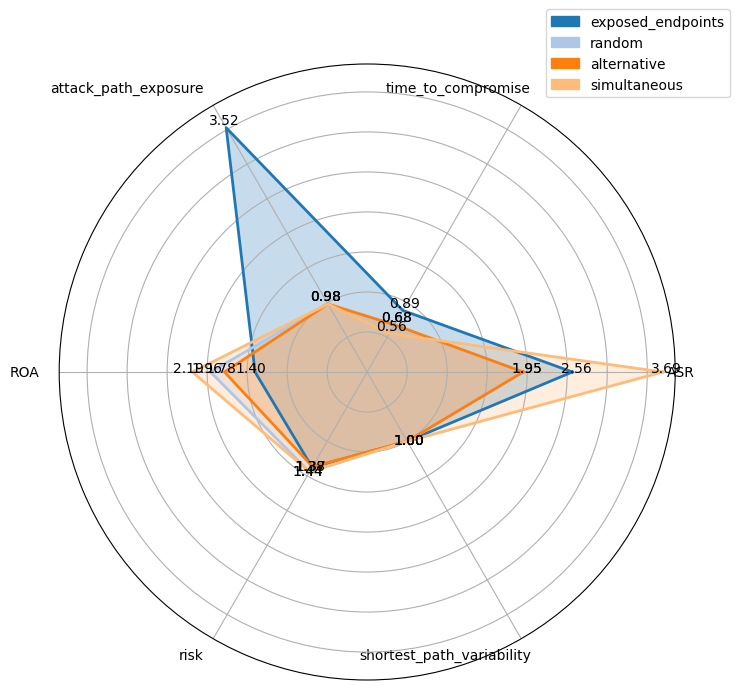

{'attack_path_exposure': {'ASR': 2.5641025641025643, 'time_to_compromise': 0.8925049455855169, 'attack_path_exposure': 3.532118957311623, 'ROA': 1.4082794766288904, 'risk': 1.3367061620215162, 'shortest_path_variability': 1.0}, 'random': {'ASR': 1.948717948717949, 'time_to_compromise': 0.6783407612050005, 'attack_path_exposure': 0.983115468409586, 'ROA': 1.9580821334201168, 'risk': 1.4407564403505013, 'shortest_path_variability': 1.0}, 'alternative': {'ASR': 1.948717948717949, 'time_to_compromise': 0.6810570164760662, 'attack_path_exposure': 0.9812745394140743, 'ROA': 1.7831937199127463, 'risk': 1.3663889609951643, 'shortest_path_variability': 1.0}, 'simultaneous': {'ASR': 3.6923076923076934, 'time_to_compromise': 0.555439839757529, 'attack_path_exposure': 0.9810572509863916, 'ROA': 2.1860890062892944, 'risk': 1.4407564403505013, 'shortest_path_variability': 1.0}}


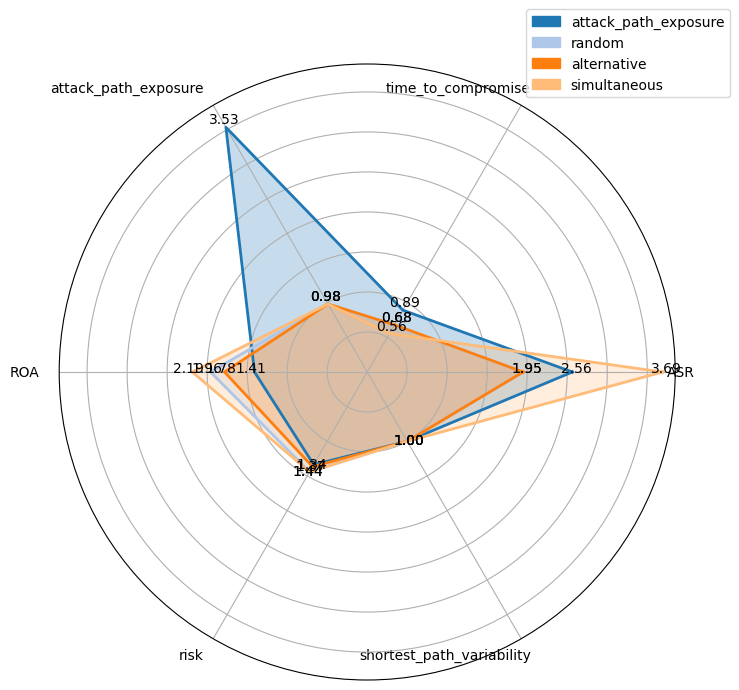

{'overall_asr_avg': {'ASR': 2.5641025641025643, 'time_to_compromise': 0.8870981576145242, 'attack_path_exposure': 3.529539570168927, 'ROA': 1.3218020293439467, 'risk': 1.2699155796591932, 'shortest_path_variability': 1.0}, 'random': {'ASR': 1.948717948717949, 'time_to_compromise': 0.6783407612050005, 'attack_path_exposure': 0.983115468409586, 'ROA': 1.9580821334201168, 'risk': 1.4407564403505013, 'shortest_path_variability': 1.0}, 'alternative': {'ASR': 1.948717948717949, 'time_to_compromise': 0.6810570164760662, 'attack_path_exposure': 0.9812745394140743, 'ROA': 1.7831937199127463, 'risk': 1.3663889609951643, 'shortest_path_variability': 1.0}, 'simultaneous': {'ASR': 3.6923076923076934, 'time_to_compromise': 0.555439839757529, 'attack_path_exposure': 0.9810572509863916, 'ROA': 2.1860890062892944, 'risk': 1.4407564403505013, 'shortest_path_variability': 1.0}}


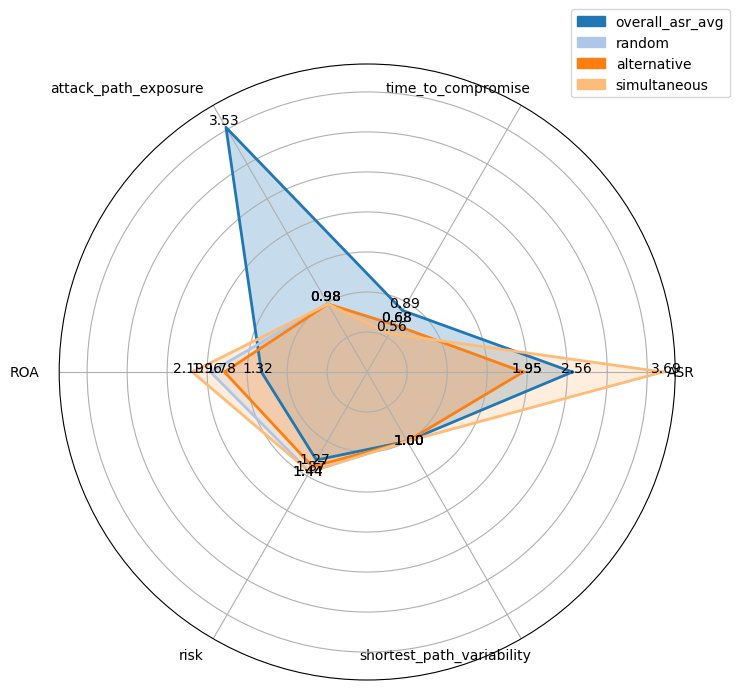

{'roa': {'ASR': 2.5641025641025643, 'time_to_compromise': 0.8972096775414493, 'attack_path_exposure': 3.5289858133346232, 'ROA': 1.398124259880247, 'risk': 1.3236898390640097, 'shortest_path_variability': 1.0}, 'random': {'ASR': 1.948717948717949, 'time_to_compromise': 0.6783407612050005, 'attack_path_exposure': 0.983115468409586, 'ROA': 1.9580821334201168, 'risk': 1.4407564403505013, 'shortest_path_variability': 1.0}, 'alternative': {'ASR': 1.948717948717949, 'time_to_compromise': 0.6810570164760662, 'attack_path_exposure': 0.9812745394140743, 'ROA': 1.7831937199127463, 'risk': 1.3663889609951643, 'shortest_path_variability': 1.0}, 'simultaneous': {'ASR': 3.6923076923076934, 'time_to_compromise': 0.555439839757529, 'attack_path_exposure': 0.9810572509863916, 'ROA': 2.1860890062892944, 'risk': 1.4407564403505013, 'shortest_path_variability': 1.0}}


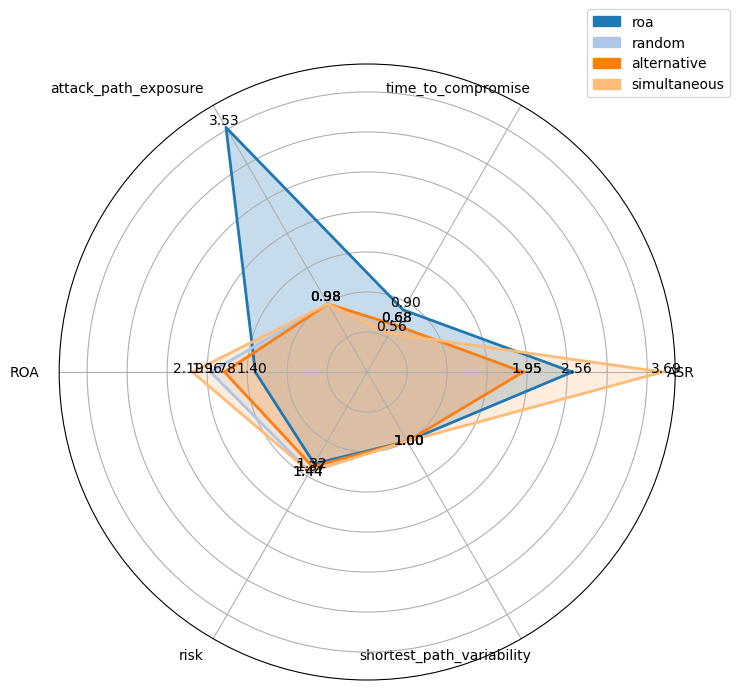

{'shortest_path_variability': {'ASR': 2.5641025641025643, 'time_to_compromise': 0.8918906970661534, 'attack_path_exposure': 3.536155469425516, 'ROA': 1.367585891265855, 'risk': 1.3299024406361915, 'shortest_path_variability': 1.0}, 'random': {'ASR': 1.948717948717949, 'time_to_compromise': 0.6783407612050005, 'attack_path_exposure': 0.983115468409586, 'ROA': 1.9580821334201168, 'risk': 1.4407564403505013, 'shortest_path_variability': 1.0}, 'alternative': {'ASR': 1.948717948717949, 'time_to_compromise': 0.6810570164760662, 'attack_path_exposure': 0.9812745394140743, 'ROA': 1.7831937199127463, 'risk': 1.3663889609951643, 'shortest_path_variability': 1.0}, 'simultaneous': {'ASR': 3.6923076923076934, 'time_to_compromise': 0.555439839757529, 'attack_path_exposure': 0.9810572509863916, 'ROA': 2.1860890062892944, 'risk': 1.4407564403505013, 'shortest_path_variability': 1.0}}


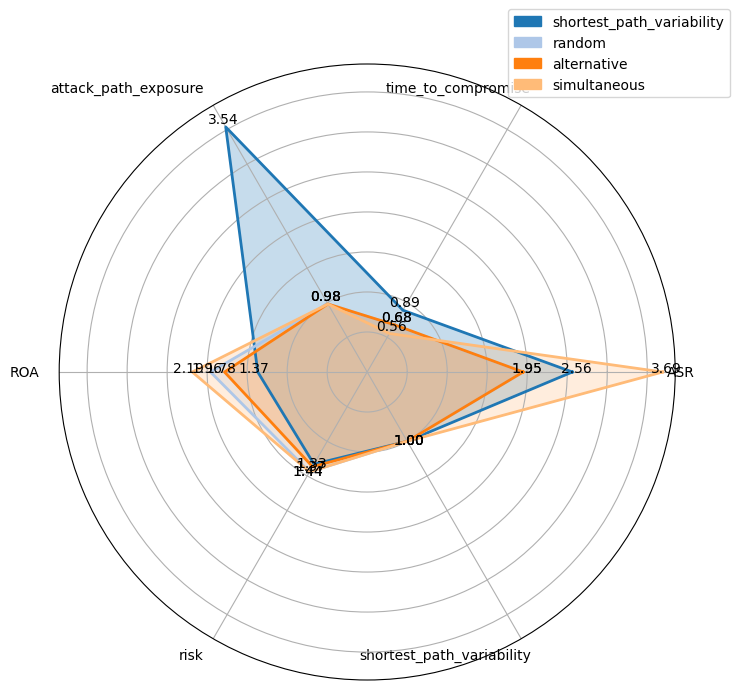

{'risk': {'ASR': 2.5641025641025643, 'time_to_compromise': 0.8935318139892248, 'attack_path_exposure': 3.5223436516564623, 'ROA': 1.3858714087228872, 'risk': 1.3177518270854565, 'shortest_path_variability': 1.0}, 'random': {'ASR': 1.948717948717949, 'time_to_compromise': 0.6783407612050005, 'attack_path_exposure': 0.983115468409586, 'ROA': 1.9580821334201168, 'risk': 1.4407564403505013, 'shortest_path_variability': 1.0}, 'alternative': {'ASR': 1.948717948717949, 'time_to_compromise': 0.6810570164760662, 'attack_path_exposure': 0.9812745394140743, 'ROA': 1.7831937199127463, 'risk': 1.3663889609951643, 'shortest_path_variability': 1.0}, 'simultaneous': {'ASR': 3.6923076923076934, 'time_to_compromise': 0.555439839757529, 'attack_path_exposure': 0.9810572509863916, 'ROA': 2.1860890062892944, 'risk': 1.4407564403505013, 'shortest_path_variability': 1.0}}


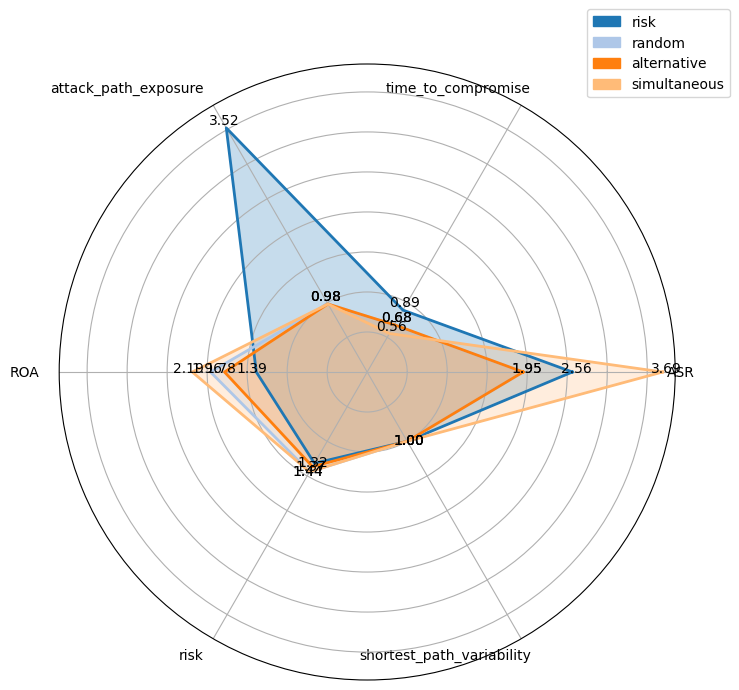

{'mtd_freq': {'ASR': 2.5641025641025643, 'time_to_compromise': 0.8884969849881589, 'attack_path_exposure': 3.528858047971036, 'ROA': 1.3358585199649524, 'risk': 1.291383975124095, 'shortest_path_variability': 1.0}, 'random': {'ASR': 1.948717948717949, 'time_to_compromise': 0.6783407612050005, 'attack_path_exposure': 0.983115468409586, 'ROA': 1.9580821334201168, 'risk': 1.4407564403505013, 'shortest_path_variability': 1.0}, 'alternative': {'ASR': 1.948717948717949, 'time_to_compromise': 0.6810570164760662, 'attack_path_exposure': 0.9812745394140743, 'ROA': 1.7831937199127463, 'risk': 1.3663889609951643, 'shortest_path_variability': 1.0}, 'simultaneous': {'ASR': 3.6923076923076934, 'time_to_compromise': 0.555439839757529, 'attack_path_exposure': 0.9810572509863916, 'ROA': 2.1860890062892944, 'risk': 1.4407564403505013, 'shortest_path_variability': 1.0}}


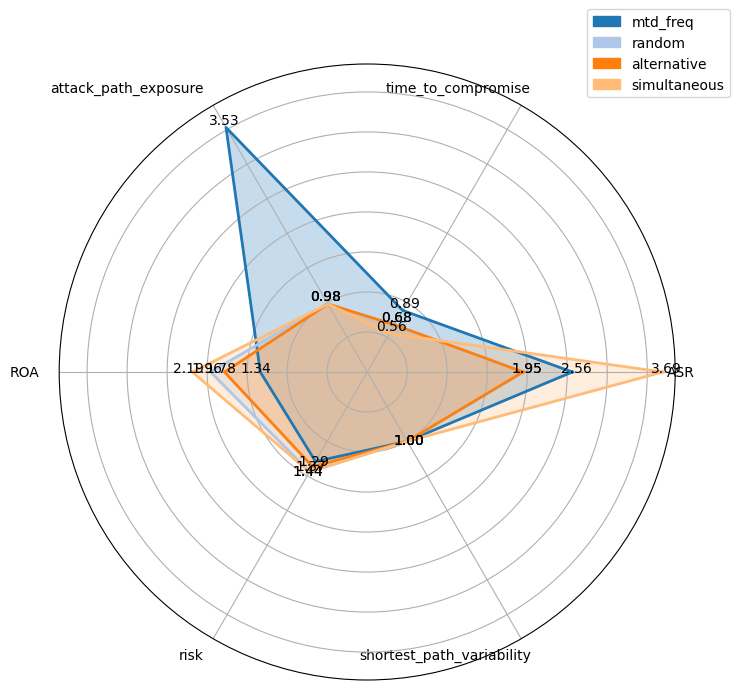

{'overall_mttc_avg': {'ASR': 2.5641025641025643, 'time_to_compromise': 0.8856025885602329, 'attack_path_exposure': 3.5230332712847656, 'ROA': 1.295667602755513, 'risk': 1.2379195206967593, 'shortest_path_variability': 1.0}, 'random': {'ASR': 1.948717948717949, 'time_to_compromise': 0.6783407612050005, 'attack_path_exposure': 0.983115468409586, 'ROA': 1.9580821334201168, 'risk': 1.4407564403505013, 'shortest_path_variability': 1.0}, 'alternative': {'ASR': 1.948717948717949, 'time_to_compromise': 0.6810570164760662, 'attack_path_exposure': 0.9812745394140743, 'ROA': 1.7831937199127463, 'risk': 1.3663889609951643, 'shortest_path_variability': 1.0}, 'simultaneous': {'ASR': 3.6923076923076934, 'time_to_compromise': 0.555439839757529, 'attack_path_exposure': 0.9810572509863916, 'ROA': 2.1860890062892944, 'risk': 1.4407564403505013, 'shortest_path_variability': 1.0}}


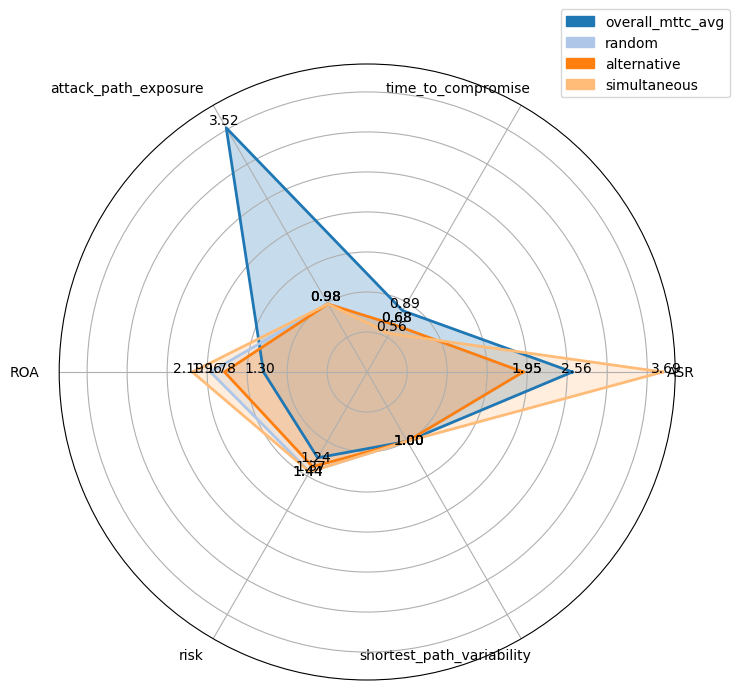

In [9]:
for model in models:
    radar = RadarPlot(epsilon, start_time, finish_time, mtd_interval, network_size,total_nodes, new_network,  model, trial, result_head_path)
    schemes_data = pd.DataFrame(radar.multiple_scaled_pipeline([model, 'random', 'alternative', "simultaneous"],run_trial = False)).T.drop(columns=['MEF', 'host_compromise_ratio', 'network_size', 'exposed_endpoints', "mtd_interval"], axis = 1).T.to_dict()
    print(schemes_data)
    radar.plot_n_schemes(schemes_data)

{'host_compromise_ratio': {'ASR': 2.5641025641025643, 'time_to_compromise': 0.8889556996967776, 'attack_path_exposure': 3.5325883418906656, 'ROA': 1.2969000851262424, 'risk': 1.195276831961158, 'shortest_path_variability': 1.0}, 'exposed_endpoints': {'ASR': 2.5641025641025643, 'time_to_compromise': 0.8888615293689891, 'attack_path_exposure': 3.5248594142713356, 'ROA': 1.4013580603997515, 'risk': 1.3760572845746573, 'shortest_path_variability': 1.0}, 'attack_path_exposure': {'ASR': 2.5641025641025643, 'time_to_compromise': 0.8925049455855169, 'attack_path_exposure': 3.532118957311623, 'ROA': 1.4082794766288904, 'risk': 1.3367061620215162, 'shortest_path_variability': 1.0}, 'overall_asr_avg': {'ASR': 2.5641025641025643, 'time_to_compromise': 0.8870981576145242, 'attack_path_exposure': 3.529539570168927, 'ROA': 1.3218020293439467, 'risk': 1.2699155796591932, 'shortest_path_variability': 1.0}, 'roa': {'ASR': 2.5641025641025643, 'time_to_compromise': 0.8972096775414493, 'attack_path_exposur

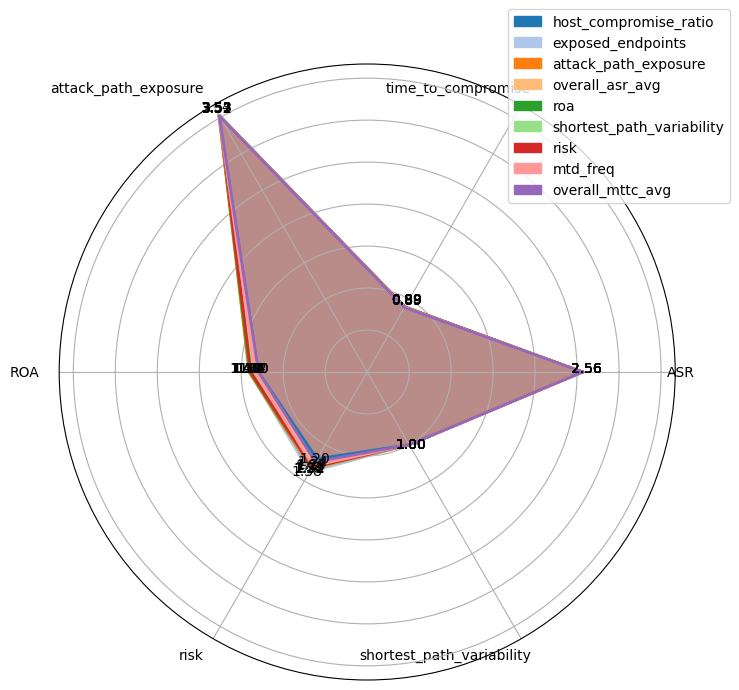

In [10]:

radar = RadarPlot(epsilon, start_time, finish_time, mtd_interval, network_size,total_nodes, new_network,  model, trial, result_head_path)
schemes_data = pd.DataFrame(radar.multiple_scaled_pipeline(models,run_trial = False)).T.drop(columns=['MEF', 'host_compromise_ratio', 'network_size', 'exposed_endpoints', "mtd_interval"], axis = 1).T.to_dict()
print(schemes_data)
radar.plot_n_schemes(schemes_data)